Nearest Neighbor's

"K-Nearest Neighbor" algorithm
![Euclidean&Square](images/EuclideanDist_and_SquareDist.png)
![L2Norm](images/L2Norm.png)
![Manhattan](images/ManhattanNorm.png)
![DotProduct](images/DotProduct.png)

 * math.sqrt(sum([(a[i]-b[i])**2 for i in range(d)]))

### Feature Engineering
The process of measuring distances between features

In [6]:
from sklearn import neighbors
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/malware-test.csv
!wget https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/malware-train.csv

In [7]:
def getdat(filename):
    with open(filename, 'r') as f:
        data = f.readlines()
    dat = []
    labs = []
    for line in data:
        wordline = line.split(",")
        labs = labs + [wordline[0] == "pe-malicious"]
        dat = dat + [[ float(wordline[i]) for i in range(1,len(wordline)) ]]
    return dat,labs

# def getdat(filename):
#     with open(filename, "r") as f:
#        data = f.readlines()
#     dat = []
#     labs = []
#     for line in data:
#         wordline = line.split(",")
#         labs = labs + [wordline[0] == "pe-malicious"]
#         dat = dat + [[float(wordline[i]) for i in range(1,len(wordline))]]
#     return(dat,labs)
# traindat, trainlabs = getdat("malware-train.csv")
# testdat, testlabs = getdat("malware-test.csv")

In [8]:
traindat, trainlabs = getdat("malware-train.csv")
testdat, testlabs = getdat("malware-test.csv")

In [9]:
def testscore(dat,labs):
    yhats = clf.predict(dat)
    correct = sum([yhats[i] == labs[i] for i in range(len(dat))])
    return correct

# def testscore(dat,labs):
#     yhats = clf.predict(dat)
#     correct = sum([yhats[i] == labs[i] for i in range(len(dat))])
#     return(correct)

In [10]:
acc = []
m = 4000
for k in [1,5,7,9]:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k,metric="cosine")
    clf = clf.fit(traindat[:m],trainlabs[:m])
    # tscore1 = testscore(traindat[:m],trainlabs[:m])/m
    # tscore2 = testscore(testdat,testlabs)/len(testlabs)
    acc = acc + [[k,testscore(traindat[:m],trainlabs[:m])/m,testscore(testdat,testlabs)/len(testlabs)]]

# acc = []
# m = 4000
# for k in [1,5,7,9]:
#     clf = neighbors.KNeighborsClassifier(n_neighbors=k,metric="cosine")
#     clf = clf.fit(traindat[:m], trainlabs[:m])
#     acc = acc + [[k, testscore(traindat[:m],trainlabs[:m])/m, testscore(testdat,testlabs)/len(testlabs)]]

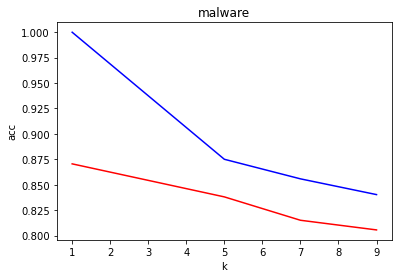

In [11]:
# plot dependence on k
plt.plot([v[0] for v in acc],[v[1] for v in acc],c='blue')
plt.plot([v[0] for v in acc],[v[2] for v in acc],c='red')
plt.title('malware')
plt.xlabel('k')
plt.ylabel('acc')
plt.show()

# plt.plot([v[0] for v in acc], [v[1] for v in acc], c="blue")
# plt.plot([v[0] for v in acc], [v[2] for v in acc], c="red")
# plt.title('malware')
# plt.xlabel('k')
# plt.ylabel('acc')
# plt.show()